#匯入tensorflow_version 2.x

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

# 資料預處理

In [3]:
import tensorflow.keras.utils as np_utils
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print("train data:",'images:',x_train_image.shape,"labels:",y_train_label.shape) 
print("test  data:",'images:',x_test_image.shape ," labels:",y_test_label.shape) 

train data: images: (60000, 28, 28) labels: (60000,)
test  data: images: (10000, 28, 28)  labels: (10000,)


In [6]:
x_train=x_train_image.reshape(-1,784).astype('float32')
x_test=x_test_image.reshape(-1,784).astype('float32')

In [7]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [8]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [9]:
class_names =["0","1","2","3","4","5","6","7","8","9"]

# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [11]:
model = Sequential()

In [12]:
model.add(Dense(input_dim=784,
     kernel_initializer='normal',units=1000, 
     activation='relu'))

In [13]:
model.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


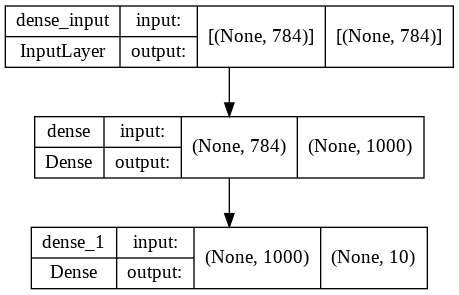

In [15]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [16]:
model.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [17]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,validation_split=0.2,
    batch_size=200,epochs=10,verbose=2)

Epoch 1/10
240/240 - 5s - loss: 0.2908 - acc: 0.9161 - val_loss: 0.1483 - val_acc: 0.9581 - 5s/epoch - 23ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1167 - acc: 0.9664 - val_loss: 0.1052 - val_acc: 0.9684 - 1s/epoch - 5ms/step
Epoch 3/10
240/240 - 1s - loss: 0.0745 - acc: 0.9793 - val_loss: 0.0908 - val_acc: 0.9718 - 1s/epoch - 5ms/step
Epoch 4/10
240/240 - 1s - loss: 0.0509 - acc: 0.9855 - val_loss: 0.0889 - val_acc: 0.9736 - 1s/epoch - 5ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0361 - acc: 0.9905 - val_loss: 0.0806 - val_acc: 0.9756 - 1s/epoch - 5ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0252 - acc: 0.9938 - val_loss: 0.0824 - val_acc: 0.9750 - 1s/epoch - 5ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0192 - acc: 0.9954 - val_loss: 0.0799 - val_acc: 0.9748 - 1s/epoch - 5ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0710 - val_acc: 0.9792 - 1s/epoch - 5ms/step
Epoch 9/10
240/240 - 1s - loss: 0.0094 - acc: 0.9984 - val_loss: 0.0740 - val_acc: 0.9798 - 1s/epoch - 

# 以圖形顯示訓練過程

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

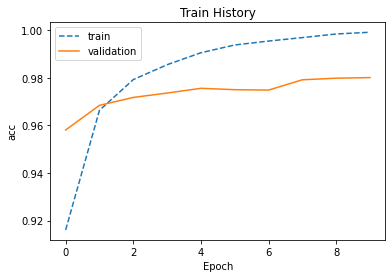

In [19]:
show_train_history(train_history,'acc','val_acc')

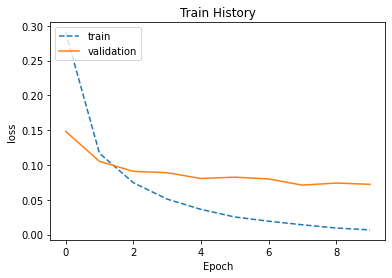

In [20]:
show_train_history(train_history,'loss','val_loss') 

# 評估模型準確率

In [21]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2) 

313/313 - 1s - loss: 0.0625 - acc: 0.9821 - 894ms/epoch - 3ms/step


# 進行預測

不能使用model.predict_classes

In [22]:
#prediction=  model.predict_classes(x_test_normalize)

建議使用model.predict +tf.argmax 取代

In [23]:
probability = model.predict(x_test_normalize)

In [24]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [25]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

model.predict(x)詳細介紹

In [26]:
probability = model.predict(x_test_normalize)

In [27]:
probability.shape

(10000, 10)

In [28]:
probability [:2]

array([[1.13332810e-08, 4.21266222e-09, 1.28993065e-06, 4.55861191e-05,
        8.70447724e-12, 2.59458366e-09, 6.10089182e-13, 9.99950886e-01,
        8.55100893e-07, 1.40253462e-06],
       [1.12466515e-10, 2.13021758e-06, 9.99997735e-01, 1.61713629e-08,
        5.45020682e-15, 2.47337417e-09, 7.27711003e-10, 1.35909909e-14,
        9.13298450e-08, 3.06052282e-14]], dtype=float32)

tf.argmax用法

In [29]:
data = tf.constant([[3, 2, 1],
           [1, 2, 3],
           [2, 5, 4],
           [1, 9, 3]])

In [30]:
print('     ',tf.argmax(data,0).numpy())

      [0 3 2]


In [31]:
print('    ',tf.argmax(data,-1).numpy())

     [0 2 1 1]


預測類別

In [32]:
probability[0]

array([1.1333281e-08, 4.2126622e-09, 1.2899307e-06, 4.5586119e-05,
       8.7044772e-12, 2.5945837e-09, 6.1008918e-13, 9.9995089e-01,
       8.5510089e-07, 1.4025346e-06], dtype=float32)

In [33]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [34]:
prediction[0]

7

#顯示機率

In [35]:
def show_predicted_probability(images,labels,
     prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',labels[idx])
  if len(labels)>0:print('predict:',prediction[idx])
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[idx][i])) 

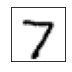

label: 7
predict: 7
0  Probability:0.000000011
1  Probability:0.000000004
2  Probability:0.000001290
3  Probability:0.000045586
4  Probability:0.000000000
5  Probability:0.000000003
6  Probability:0.000000000
7  Probability:0.999950886
8  Probability:0.000000855
9  Probability:0.000001403


In [36]:
show_predicted_probability(x_test_image,y_test_label,
              prediction,probability,0)

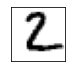

label: 2
predict: 2
0  Probability:0.000000000
1  Probability:0.000002130
2  Probability:0.999997735
3  Probability:0.000000016
4  Probability:0.000000000
5  Probability:0.000000002
6  Probability:0.000000001
7  Probability:0.000000000
8  Probability:0.000000091
9  Probability:0.000000000


In [37]:
show_predicted_probability(x_test_image,y_test_label,
             prediction,probability,1)

In [38]:
prediction=tf.argmax(probability, axis=1).numpy()

In [39]:
prediction[0]

7

In [40]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()

In [41]:
prediction 

array([7, 2, 1, ..., 4, 5, 6])

#顯示預測結果

In [42]:
#prediction=  model.predict_classes(x_test_normalize)

In [43]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

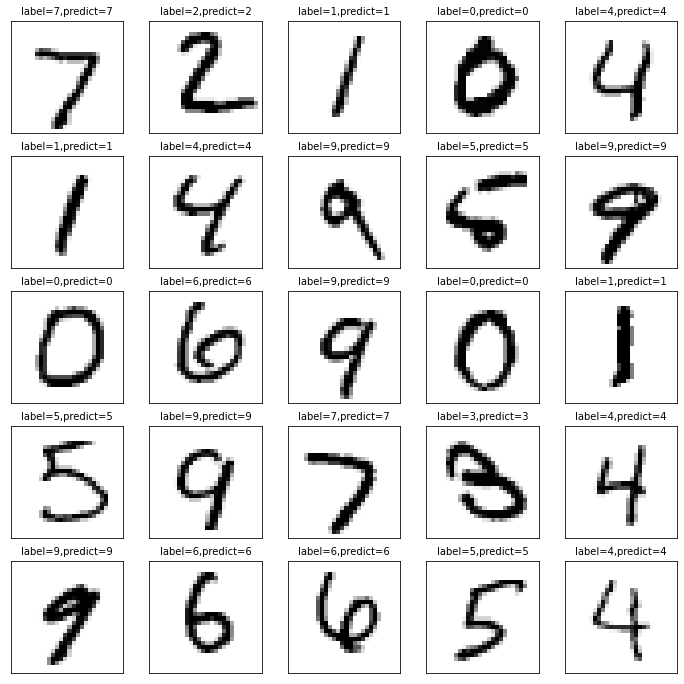

In [44]:
plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=0,num=25)

# confusion matrix

In [45]:
import pandas as pd

In [46]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [47]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,1,1,0,1,0,3,1,3,0
1,0,1129,3,0,0,1,2,0,0,0
2,2,2,1015,0,1,0,2,4,6,0
3,0,0,5,987,0,5,0,4,3,6
4,2,3,3,0,960,0,3,1,2,8
5,2,0,0,6,1,871,4,2,4,2
6,2,3,1,1,3,4,944,0,0,0
7,0,5,9,1,0,0,0,1007,1,5
8,0,1,4,4,3,1,2,2,952,5


# 查看預測錯誤資料

In [48]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [49]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2597,5,3
5937,5,3


# 查看預測錯誤資料

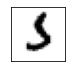

label: 5
predict: 3
0  Probability:0.000000002
1  Probability:0.000545079
2  Probability:0.000000657
3  Probability:0.757565081
4  Probability:0.000000026
5  Probability:0.241802946
6  Probability:0.000030220
7  Probability:0.000000000
8  Probability:0.000055634
9  Probability:0.000000326


In [50]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,340)

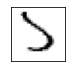

label: 5
predict: 3
0  Probability:0.000000120
1  Probability:0.000137828
2  Probability:0.000017992
3  Probability:0.984338343
4  Probability:0.000000011
5  Probability:0.015337866
6  Probability:0.000071073
7  Probability:0.000023597
8  Probability:0.000051966
9  Probability:0.000021298


In [51]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1393)